# Insper: Prof Márcio

# Ciência dos dados: Engenharias

# Projeto 3: PNADC - Uso dos microdados de 2023
___


- #### Taina Nascimento Barreto
- #### Matheus Henrique Silva Amorim
- #### Max Mattos
- #### Evilyn Araujo Vitoraci


# Introdução do Projeto: 
Considerando fatores sociais, como nível de escolaridade e ocupação profissional, o objetivo deste projeto é entender como essas variáveis podem ser usadas para prever a renda domiciliar média de uma população. Com base nesses dados, buscamos mapear as principais características socioeconômicas que influenciam diretamente a renda em diferentes regiões brasileiras, identificando se esses fatores variam de acordo com o contexto regional e em que medida cada um impacta a renda domiciliar média.

A compreensão desses fatores que afetam a renda é relevante porque pode contribuir para o desenvolvimento de políticas públicas voltadas à redução das desigualdades regionais.

Percebemos que tal questionamento é válido uma vez que já foi abordado em artigos científicos como em "Impacto da educação sobre a pobreza e distribuição de renda no Brasil (2002)", Deliberalli Priscila Pereira e "O impacto da escolaridade sobre a distribuição de renda", Marcio Antonio Salvato.

# Descrição das features escolhidas: 

### UF: 
Pelo Brasil ser um país muito grande e com variações de cultura de região para região, ele também conta com diferenças demográficas e sociais de acordo com a região ou estado que se analisa. Dessa maneira, pelos estados brasileiros contarem com distinções socioeconômicas relevantes, fatores sociais como o nível de escolaridade e a ocupação profissional podem ser mais ou menos relevantes no que diz respeito à influência na renda domiciliar média da população, sendo interessante então utilizar os estados como uma variável para essa análise.  

### Rural e urbano:  
A variável rural e urbana diferencia regiões que, geralmente, guardam características, respectivamente, mais agropecuárias e mais citadinas, o que gera uma diferença muito grande em nível de industrialização e investimentos estatais de infraestrutura, o que, novamente, gera dados socioeconômicos bem distintos entre as duas, tornando uma variável interessante de se trabalhar por poder trazer cenários bem distintos e relações possivelmente diferentes também quanto à renda familiar.  

### Pessoas na casa:
Essa é uma variável fundamental, pois pode alterar facilmente a renda média de um domicílio brasileiro, afinal essa pessoa pode ou contribuir para a renda aumentar, ao trabalhar e ajudar nos gastos da casa, ajudar a manter a mesma renda média, ou ainda diminuir a renda média da família, caso seja uma criança ou jovem que ainda não trabalha ou uma pessoa idosa, aposentada ou que não pode mais auxiliar ativamente para a manutenção econômica da família.  

### Sexo:  
O sexo se mostra um fator importante de ser analisado uma vez que ainda é colocado em pauta a disparidade entre o salário de uma mulher e de um homem mesmo exercendo um mesmo cargo. Dessa maneira, se verificado que realmente existe essa diferença, como aponta, por exemplo, o último IBGE de 2023, a quantidade de mulheres e homens economicamente ativos em uma casa pode fazer a renda variar significativamente.  

### Nível de alfabetização: 
O nível de alfabetização de uma pessoa pode influenciar significativamente o emprego que uma pessoa pode conseguir futuramente, o que impacta diretamente na renda que essa pessoa receberá. 

### Idade:  
A idade dos residentes de uma casa pode ajudar a entender o perfil econômico dessa pessoa, ajudando a analisar se ela é ou não economicamente ativa, se ainda não está em uma faixa etária que pode fazer parte da PEA ou mesmo se já se aposentou e parou de trabalhar, impactando, consequentemente, no ganho de renda para a família.   

### Cor:  
Infelizmente, no Brasil e em todo o mundo, ainda enfrentamos o racismo estrutural nas mais diversas áreas sociais, inclusive, na distribuição de renda entre as pessoas.  

### Trabalha ou faz estágio remunerado:  
Ter um trabalho ou um estágio remunerado pode garantir uma certa estabilidade econômica para os indivíduos, o que influencia na sua renda média geral.  


# Métodos utilizados no projeto: 

## Método de regressão linear:
O método de regressão linear é utilizado para prever o valor de dados desconhecidos (variável resposta), ou seja, variáveis dependentes, utilizando os valores de dados conhecidos (variáveis preditivas), que são independentes, modelando matematicamente como uma equação linear. 
O ajuste dessa equação linear se baseia no método dos mínimos quadrados, o qual busca minimizar a soma dos quadrados das diferenças entre os valores que foram observados e os valores previstos pela linha de regressão.  

Regressão linear múltipla: quando utilizamos várias variáveis independentes.  
Fórmula: 𝑌=𝛽0*𝑋0+𝛽1𝑋1+𝛽2𝑋2+……+𝛽𝑛𝑋𝑛+𝜀 
Fórmula do mmq: β=(XTX)−1XTy 

## Método “Tree Regression” ou “Árvore de decisão”:  

Uma árvore de decisão é um algoritmo muito utilizado no processo de aprendizagem de máquina e é aplicado para prever valores contínuos, sendo mais voltada para problemas de regressão. A árvore de regressão irá prever um valor numérico (resposta) com base em várias condições que dividem o conjunto de dados e se destaca por ser um método simples e que possui uma fácil visualização do processo e do resultado.  

O método “Tree Regression” divide a base de dados em subconjuntos, depois, cria uma estrutura hierárquica de decisões e, com base nos valores médios dos subconjuntos obtidos, ele prevê o valor final, ou seja, o resultado.  


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns     

___
## URL das bases de dados da PNADC <br>
Os microdados dos quatro trimestre de 2023 estão armazenados, por ora, no **Dropbox da profa. Maria Kelly Venezuela**. <br>
Esses dados são de uso exclusivo dos alunos da Engenharia do Insper.

In [7]:
# SEGUNDO TRIMESTRE DE 2023
url2 = 'https://www.dropbox.com/scl/fi/kvhduq8ocy2o1yj4l0ycc/pnad23_2.csv?rlkey=ni8nhwkv84xg59mp1cnd4gsto&st=yr8uiq5k&dl=1'     

___
# Leitura da base de dados - PNADC 2023:

___
### Filtrando e Identificando colunas desejadas do Dataframe <br>
Aqui foi feita uma seleção de colunas do Banco de Dados do Segundo Trimestre que iremos usar, leu-se o arquivo CSV desse banco de dados que criamos localmente para otimizar tempo de leitura dos dados e atribuimos nomes para as colunas do Banco de Dados.

In [10]:
# Colunas selecionadas 2 trimestre:
colunas = ["UF",
           "Capital", 
           "V1022", 
           "V1023",
           'V2001',
           "V2007", 
           "V2009", 
           "V2010", 
           "V3001", 
           "V3006", 
           "V3007", 
           "V3008",            
           "V3013", 
           "V3014", 
           "V4001", 
           "V4002", 
           "V4003", 
           "V40121",           
           "V403311",
           "V403312",
           "V403422",
           "VD3004", 
           "VD3005", 
           "VD3006",            
          ]

In [106]:
#Lendo base de dados
pnad23_2_small = pd.read_csv(url2, usecols=colunas)

In [28]:
cols ={"V1023":"Tipo de área",
       "V1022":"Rural ou Urbano",
       'V2001': 'Pessoas na Casa',
       "V2007" : 'Sexo',
       "V3001":"alfabetizado?",
       "V2009": "Idade",
       "V2010": "Cor",
       "V3006":"ano/série/semestre que frequenta", 
       "V3007":"já concluiu alguma graduação",
       "V3008":"frequentou escola?",
       "V3013":"último ano/série/semestre que concluiu com aprovação",
       "V3014":"concluiu o curso",
       "V4001":"Trabalha ou faz estágio remunerado",
       "V4002":"Na semana trabalhou ou estagiou, durante pelo menos 1 hora, em alguma atividade remunerada em outra espécie?",
       "V4003":"Na semana fez algum bico ou trabalhou em alguma atividade ocasional remunerada durante pelo menos 1 hora?",
       "V40121":"Trabalhador não remunerado",
       "V403311":"Número da faixa do rendimento/retirada em dinheiro",
       "V403312":"rendimento bruto mensal em dinheiro", 
       "V403422":"Qual foi o rendimento bruto, valor estimado dos produtos ou mercadorias",
       "VD3004":"Nível de instrução mais elevado alcançado (>= 5 anos)",
       "VD3005":"Anos de estudo (>= 5 anos)",
       "VD3006":"Grupos de anos de estudo (>= 5 anos)",
      }

Renomeando colunas para melhor entendimento 

In [30]:
#Renomeando as colunas
pnad23_2_small.rename(columns = cols, inplace=True)

Transformando colunas do Banco de Dados em Categóricas com exceção das que queremos manter como quantitativas

In [32]:
#Alterando variáveis que não mudaram para category
pnad23_2_small['UF'] = pnad23_2_small['UF'].astype('category')
pnad23_2_small['Capital'] = pnad23_2_small['Capital'].astype('category')
for coluna in cols.values():
    if coluna not in['rendimento bruto mensal em dinheiro','Pessoas na Casa','Idade',"Anos de estudo (>= 5 anos)"]:
        pnad23_2_small[coluna] = pnad23_2_small[coluna].astype('category')
pnad23_2_small.dtypes

UF                                                                                                              category
Capital                                                                                                         category
Rural ou Urbano                                                                                                 category
Tipo de área                                                                                                    category
Pessoas na Casa                                                                                                    int64
Sexo                                                                                                            category
Idade                                                                                                              int64
Cor                                                                                                             category
alfabetizado?                   

Definindo variável "dados" em que guardaremos o DataFrame filtrado só com as colunas que iremos usar

In [34]:
# Capital e Tipo de área foram tirados porque falam basicamente da mesma coisa e também não irão ter dados com diferenças tao significantes quanto os mostrados pelo UF.
# Nível de instrução tiramos pois anos de estudo é mais significativo
dados = pnad23_2_small[["UF","Rural ou Urbano",'Pessoas na Casa','Sexo',"alfabetizado?","Idade","Cor","frequentou escola?","rendimento bruto mensal em dinheiro","Trabalha ou faz estágio remunerado","Anos de estudo (>= 5 anos)"]]

Verifica quantos valores nulos existem em cada coluna e exclui linhas em que existam estes valores nulos

In [36]:
#Quantificando respostas com NaN para vermos quais variáveis já podem ser excluidas da análise por falta de informação
dados.isnull().sum()

UF                                          0
Rural ou Urbano                             0
Pessoas na Casa                             0
Sexo                                        0
alfabetizado?                           27075
Idade                                       0
Cor                                         0
frequentou escola?                     137692
rendimento bruto mensal em dinheiro    277657
Trabalha ou faz estágio remunerado      84321
Anos de estudo (>= 5 anos)              27075
dtype: int64

In [37]:
#Removendo NaN's
dados = dados.dropna()

___

### Análise Exploratória de Dados



Gráficos de Distribuição do Tipo Scatter comparando Target "Renda" com as Features  Quantitativas

- É possível concluir através dos gráficos que quanto menor o número de pessoas na casa, maior é a renda mensal e, logo, pessoas de renda baixa têm mais moradores nas residências.

- As maiores rendas estão concentradas na faixa idade de pessoas entre 30 e 70 anos, logo, adultos ativos no mercado, possivelmente com uma carreira já estabelecida para ter salários maiores e os idosos aposentados. O gráfico de Renda por idade se assemelha a uma distribuição Normal.

- É possivel notar que a renda aumenta em pessoas que tiveram mais anos de estudo, o que nos leva a crer que a educação e a formação acadêmica afetam o retorno financeiro futuro das pessoas.

In [41]:
# Variáveis Quantitativas
dados_quantitativos = dados[["Pessoas na Casa","Idade","Anos de estudo (>= 5 anos)"]]

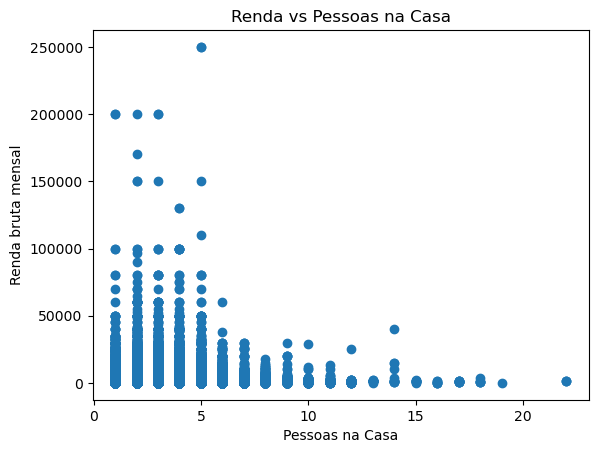

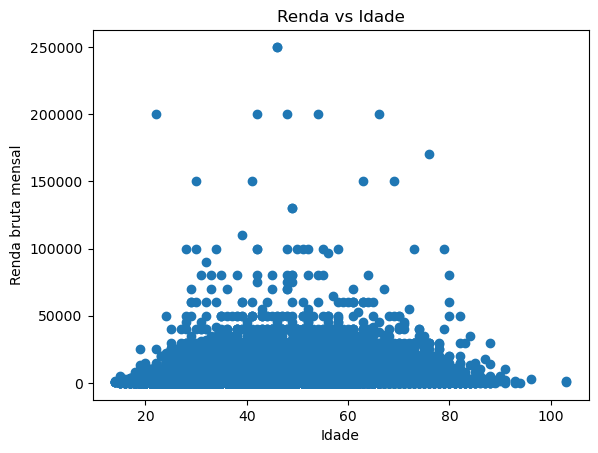

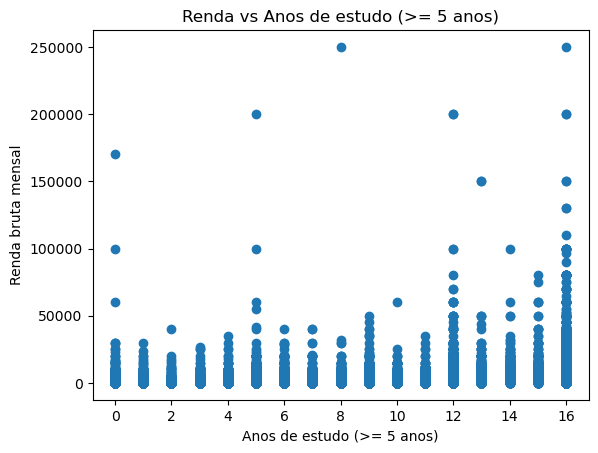

In [42]:
for coluna in dados_quantitativos:
    plt.title(f"Renda vs {coluna}")
    plt.ylabel("Renda bruta mensal")
    plt.xlabel(f"{coluna}")
    plt.scatter(dados[coluna],dados["rendimento bruto mensal em dinheiro"])
    plt.show()

Boxplots Individuais sobre as Variáveis Quantitativas

- A partir dos Boxplots e Medidas Resumo (describes) abaixo, observa-se que a maior parte das pessoas está entre os 30 e 50 anos de idada, que a Renda Bruta Mensal concentra-se bem abaixo dos 50.000 reais e os que passam são apenas outliers, sendo que 75% das pessoas não ganham acima de 2800 (dado retirado do describe) e a mediana é 1600. 
- Logo, a maior parte das pessoas possui um salário perto do atual salario minimo. 
- Além disso, a grande maioria tem entre 8 a 12 anos de estudo e em suas casas predomina-se menos de 5 pessoas, apesar dos muitos outliers.

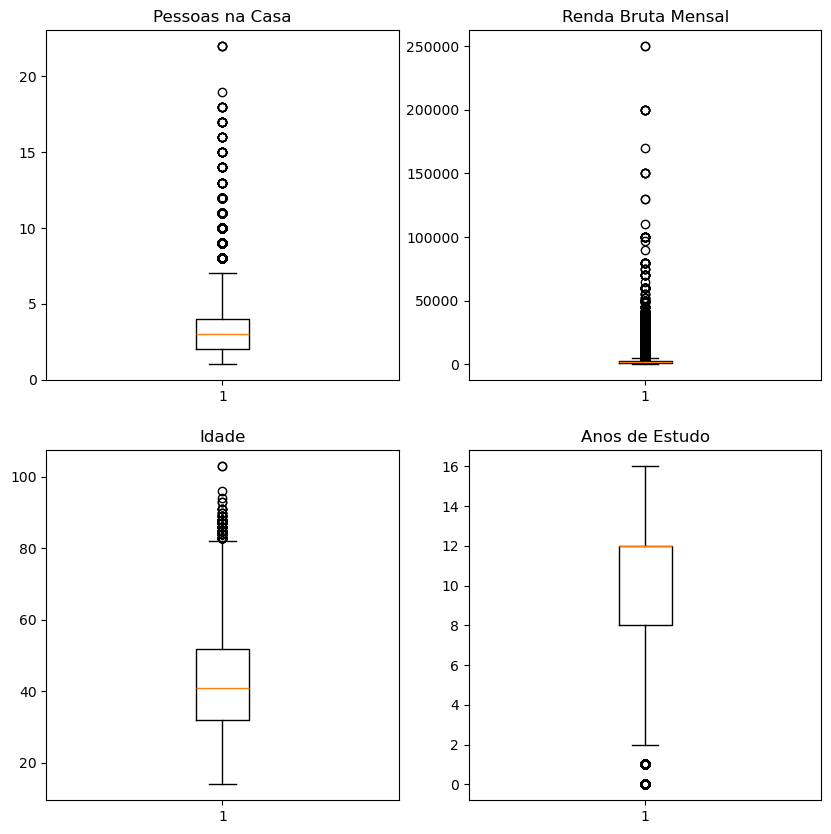

In [45]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title("Pessoas na Casa")
plt.boxplot(dados["Pessoas na Casa"])

plt.subplot(222)
plt.title("Renda Bruta Mensal")
plt.boxplot(dados["rendimento bruto mensal em dinheiro"])

plt.subplot(223)
plt.title("Idade")
plt.boxplot(dados["Idade"])

plt.subplot(224)
plt.title("Anos de Estudo")
plt.boxplot(dados["Anos de estudo (>= 5 anos)"])

plt.show()

Tabelas de Medidas Resumo (comando describe) para entender melhor as Variáveis Quantitativas

In [47]:
print(dados["Pessoas na Casa"].describe())
print(dados["rendimento bruto mensal em dinheiro"].describe())

count    179182.000000
mean          3.256650
std           1.444645
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          22.000000
Name: Pessoas na Casa, dtype: float64
count    179182.000000
mean       2639.907312
std        3976.559951
min          12.000000
25%        1302.000000
50%        1600.000000
75%        2800.000000
max      250000.000000
Name: rendimento bruto mensal em dinheiro, dtype: float64


In [48]:
print(dados["Idade"].describe())
print(dados["Anos de estudo (>= 5 anos)"].describe())

count    179182.000000
mean         42.012172
std          13.216653
min          14.000000
25%          32.000000
50%          41.000000
75%          52.000000
max         103.000000
Name: Idade, dtype: float64
count    179182.000000
mean         10.553521
std           4.314803
min           0.000000
25%           8.000000
50%          12.000000
75%          12.000000
max          16.000000
Name: Anos de estudo (>= 5 anos), dtype: float64


Correlações entre Target e Features 

- Observa-se que a única feature que tem de fato uma correlação relevante com a target é "Anos de estudo" com uma correlação de quase 30%

In [51]:
corr_Renda_nPessoas = dados["rendimento bruto mensal em dinheiro"].corr(dados["Pessoas na Casa"])
corr_Renda_Idade = dados["rendimento bruto mensal em dinheiro"].corr(dados["Idade"])
corr_Renda_AnosEstudos = dados["rendimento bruto mensal em dinheiro"].corr(dados["Anos de estudo (>= 5 anos)"])

display("Correlação Renda e Quantidade de Pessoas",corr_Renda_nPessoas)
display("Correlação entre renda e Idade",corr_Renda_Idade)
display("Correlação entre Renda e Anos de Estudos",corr_Renda_AnosEstudos)

'Correlação Renda e Quantidade de Pessoas'

-0.047413149418969416

'Correlação entre renda e Idade'

0.09534784632161603

'Correlação entre Renda e Anos de Estudos'

0.28228618085519946

Correlação entre variáveis num mapa de calor

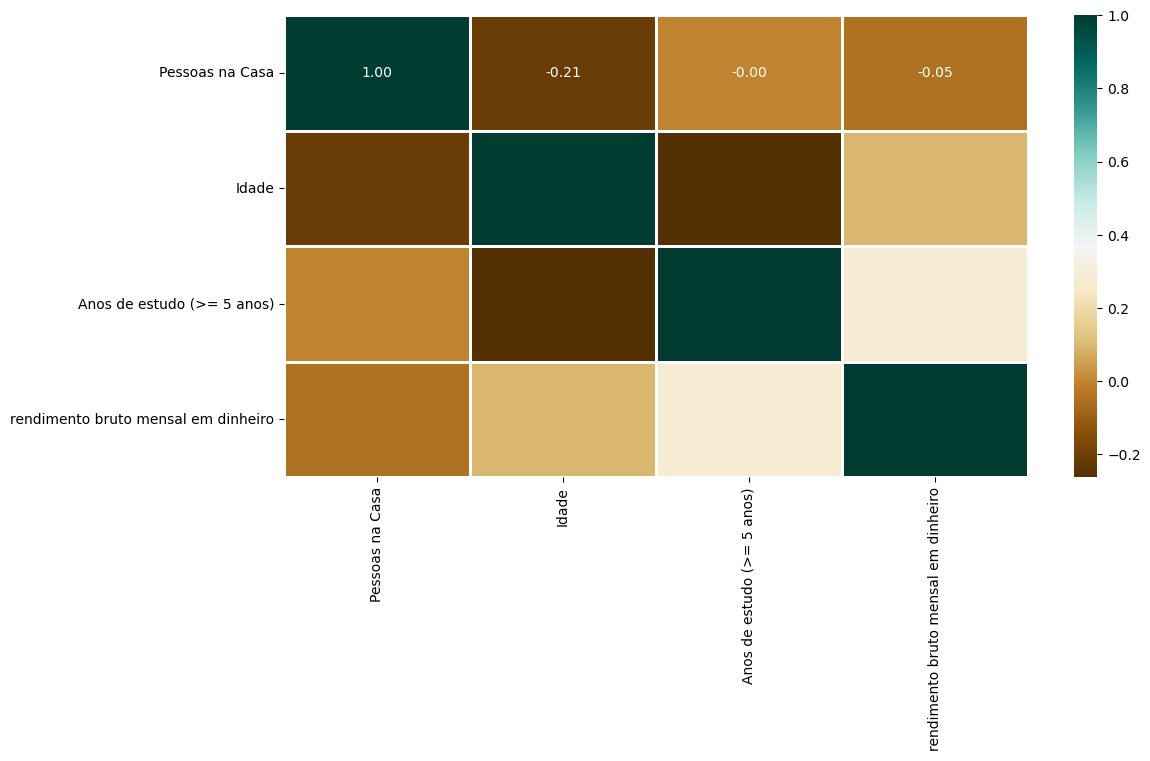

In [53]:
dados_p_matriz = dados[["Pessoas na Casa","Idade","Anos de estudo (>= 5 anos)","rendimento bruto mensal em dinheiro"]]

plt.figure(figsize=(12, 6))
sns.heatmap(dados_p_matriz.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)
plt.show()

Histogramas para as Variáveis Qualitativas

- A grande maioria frequentou a escola, é alfabetizado, trabalha ou faz estágio remunerado.  A maioria é homem, mas o número de mulheres é só um pouco abaixo do de homens. Além disso, a etinia predominante foi a parda, seguida pela branca e preta.

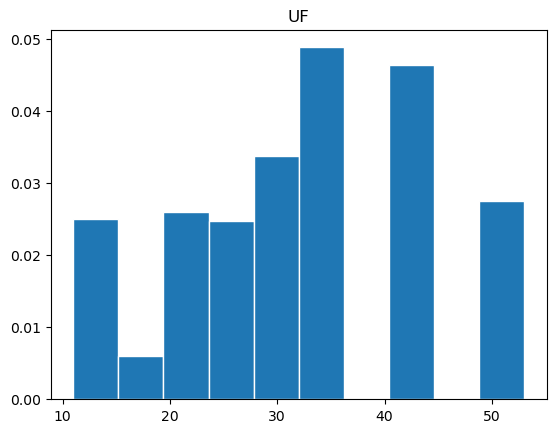

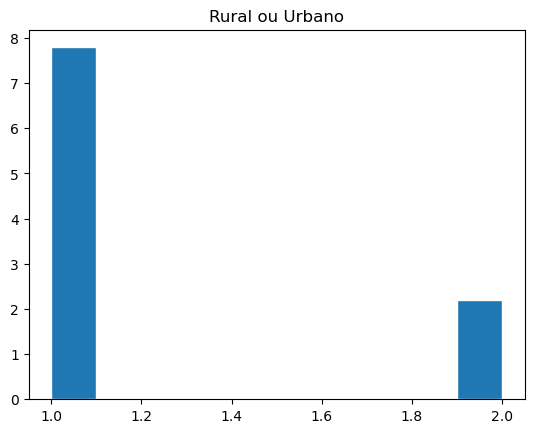

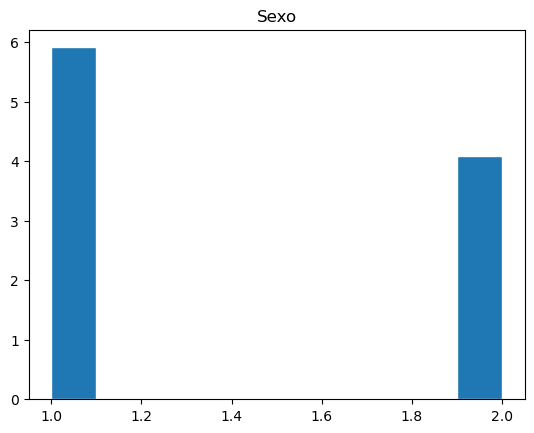

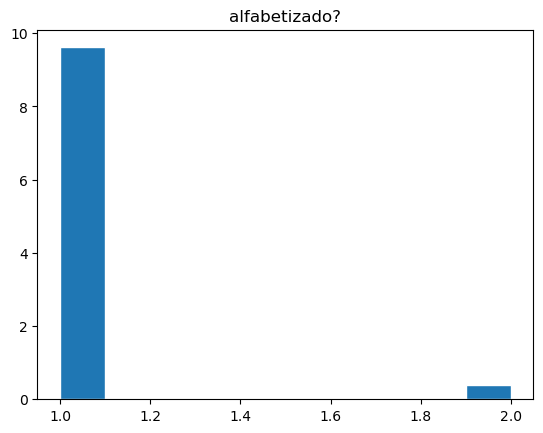

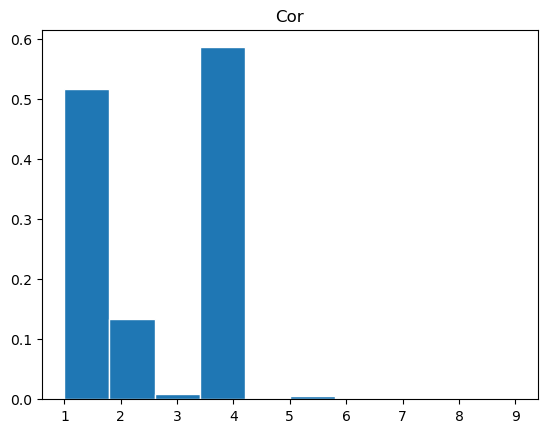

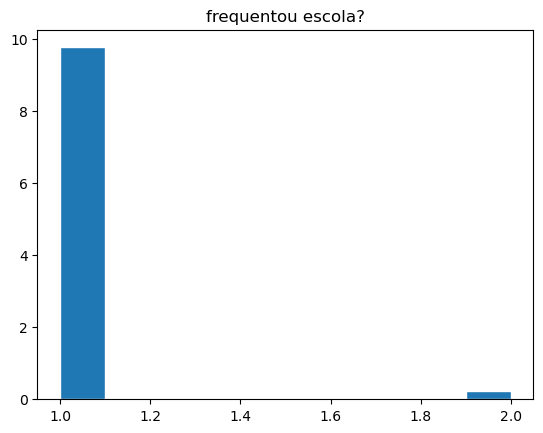

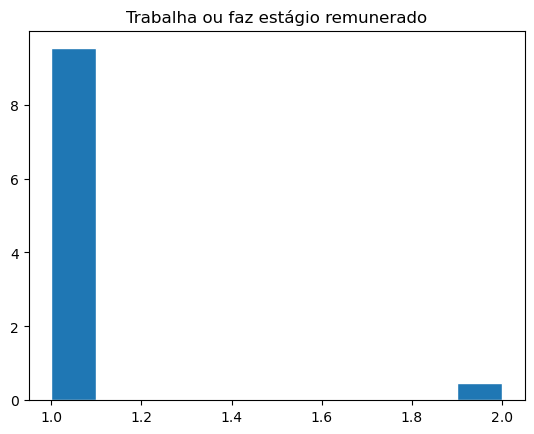

In [56]:
dados_qualitativos = dados[["UF",	"Rural ou Urbano",	"Sexo",	"alfabetizado?",	"Cor",	"frequentou escola?"	,	"Trabalha ou faz estágio remunerado"]]

for coluna in dados_qualitativos:
    plt.title(f"{coluna}")
    plt.hist(dados[f'{coluna}'],density=True,bins=10, edgecolor = 'white')
    plt.show()

Bloxplot para as Variáveis Qualitativas

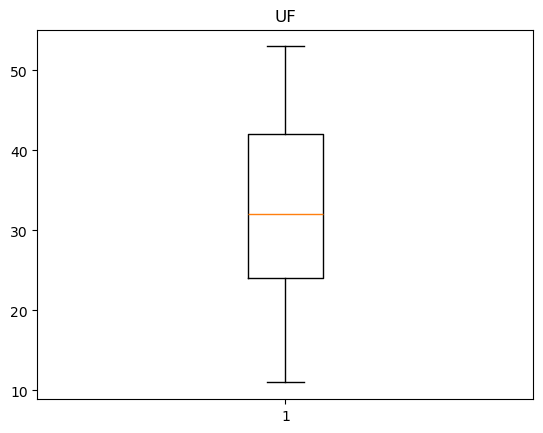

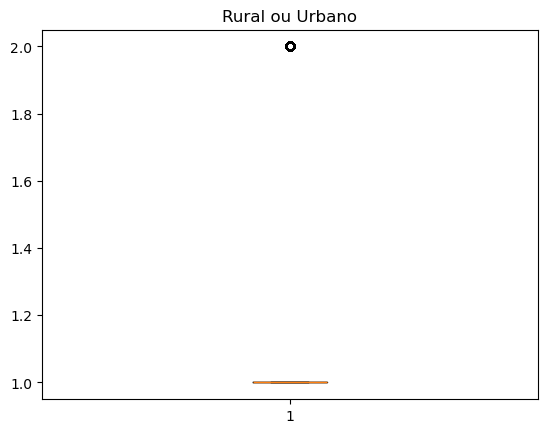

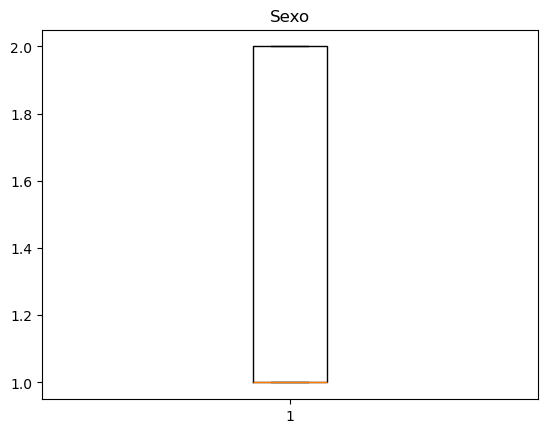

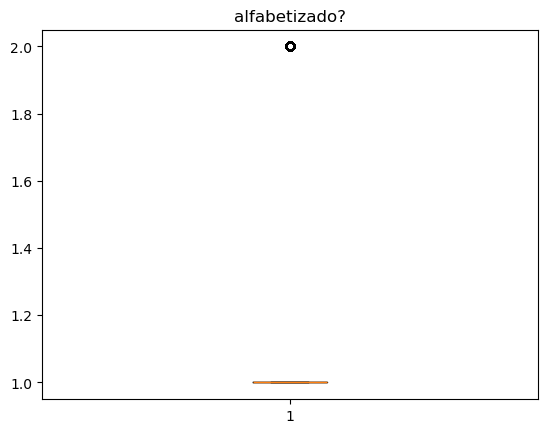

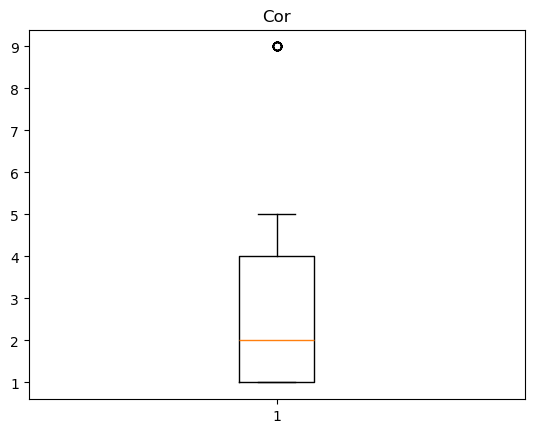

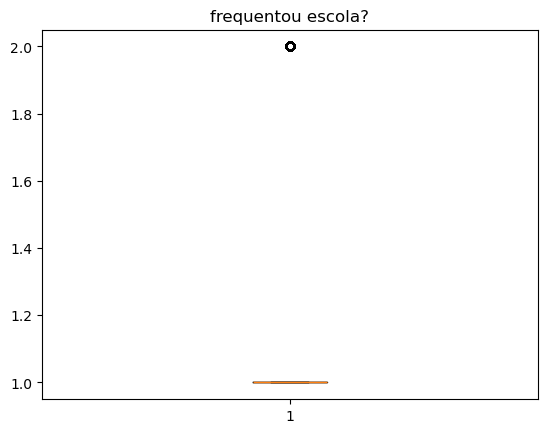

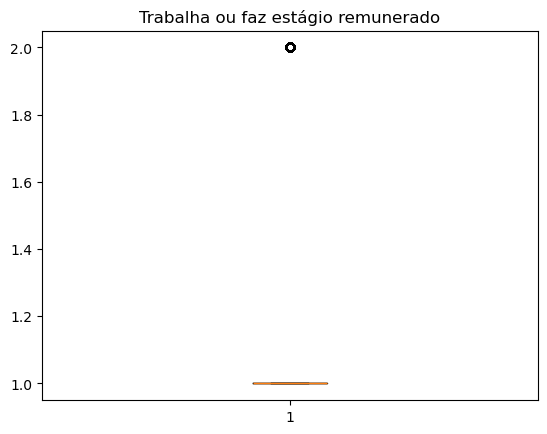

In [58]:
for coluna in dados_qualitativos:
    plt.title(f"{coluna}")
    plt.boxplot(dados[f'{coluna}'])
    plt.show()

Histogramas e Boxplot de totas as features finais:

- A maior parte das pessoas de todos os estados (UFs) tem renda abaixo dos 5000 reais. 
- A renda é maior para pessoas alfabetizadas do que para as que nao são e o mesmo ocorre para pessoas que frequentaram a escola e para as que não o fizeram, sendo que os maiores e mais frequentes outliers sempre ocorrem em pessoas que frequentaram escola e foram alfabetizadas. 
- Logo, vê-se a relação entre retorno financeiro e formação acadêmica, assim como citado anteiromente no projeto.

Coluna UF, rotulo: 11
       rendimento bruto mensal em dinheiro
count                          3085.000000
mean                           2504.413614
std                            2963.145894
min                              30.000000
25%                            1302.000000
50%                            1800.000000
75%                            2800.000000
max                           40000.000000



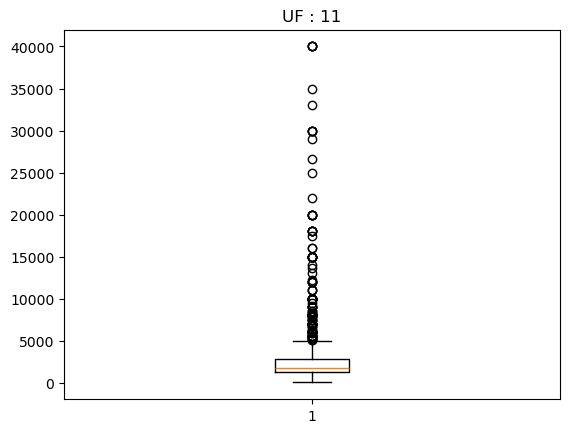

Coluna UF, rotulo: 12
       rendimento bruto mensal em dinheiro
count                          2733.000000
mean                           2424.822173
std                            3454.273319
min                              50.000000
25%                            1302.000000
50%                            1500.000000
75%                            2800.000000
max                          100000.000000



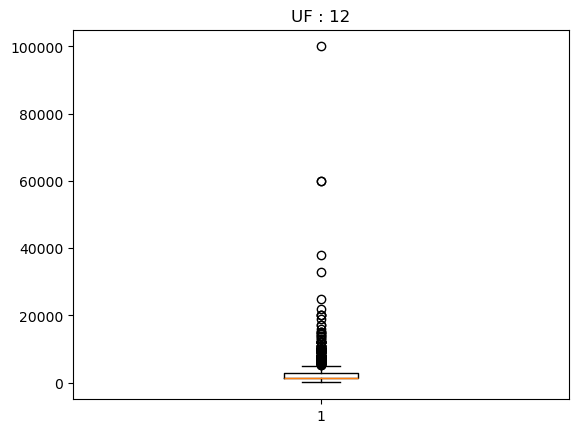

Coluna UF, rotulo: 13
       rendimento bruto mensal em dinheiro
count                          4690.000000
mean                           1990.993390
std                            3885.321028
min                              15.000000
25%                             800.000000
50%                            1320.000000
75%                            2000.000000
max                          200000.000000



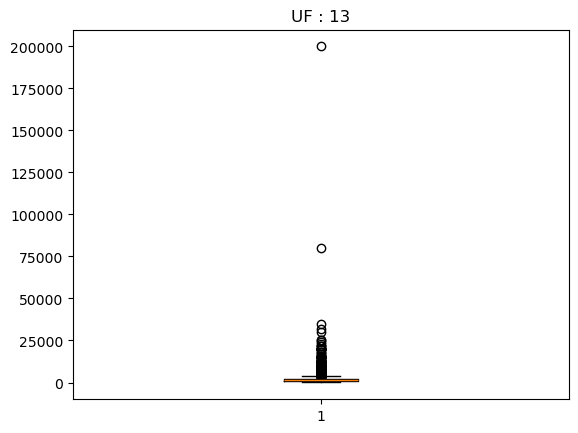

Coluna UF, rotulo: 14
       rendimento bruto mensal em dinheiro
count                          2101.000000
mean                           2567.306521
std                            3303.346683
min                              80.000000
25%                            1302.000000
50%                            1500.000000
75%                            2700.000000
max                           40000.000000



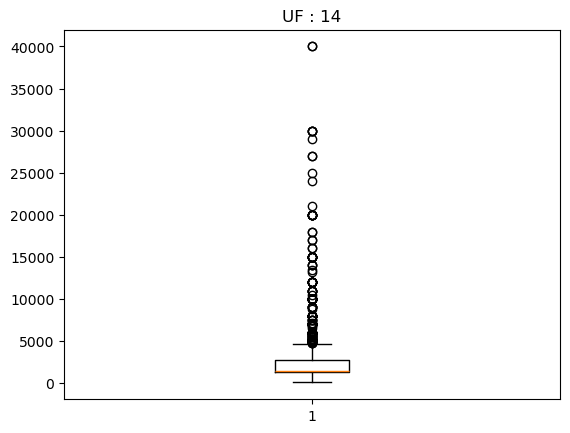

Coluna UF, rotulo: 15
       rendimento bruto mensal em dinheiro
count                          6169.000000
mean                           1954.833360
std                            3331.924784
min                              20.000000
25%                             700.000000
50%                            1320.000000
75%                            2000.000000
max                          150000.000000



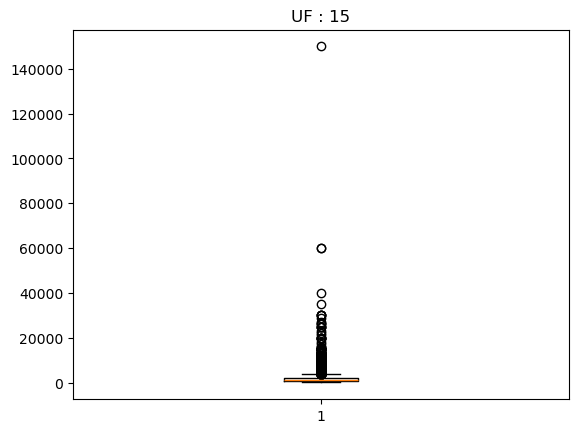

Coluna UF, rotulo: 16
       rendimento bruto mensal em dinheiro
count                          1620.000000
mean                           2491.225309
std                            2861.082217
min                             100.000000
25%                            1200.000000
50%                            1500.000000
75%                            3000.000000
max                           24000.000000



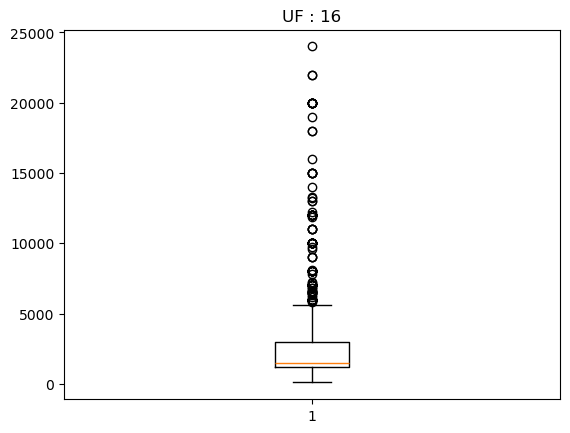

Coluna UF, rotulo: 17
       rendimento bruto mensal em dinheiro
count                          2899.000000
mean                           2477.351845
std                            3104.342128
min                              60.000000
25%                            1302.000000
50%                            1500.000000
75%                            2700.000000
max                           45000.000000



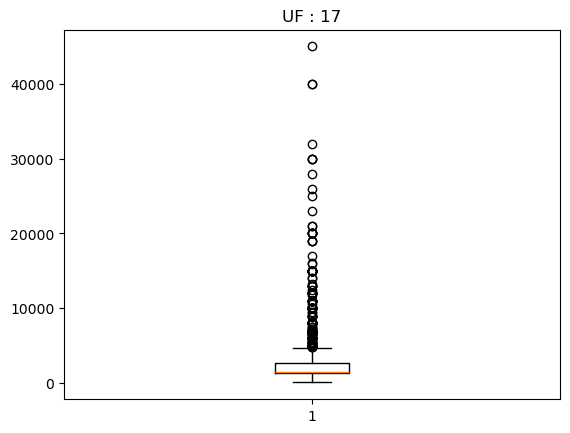

Coluna UF, rotulo: 21
       rendimento bruto mensal em dinheiro
count                          8894.000000
mean                           1511.365078
std                            2302.723745
min                              20.000000
25%                             500.000000
50%                            1302.000000
75%                            1500.000000
max                          100000.000000



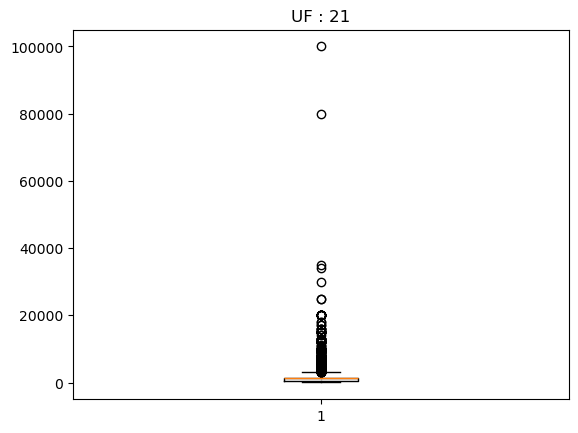

Coluna UF, rotulo: 22
       rendimento bruto mensal em dinheiro
count                          3436.000000
mean                           1920.512224
std                            4171.183697
min                              15.000000
25%                             600.000000
50%                            1320.000000
75%                            1950.000000
max                          170000.000000



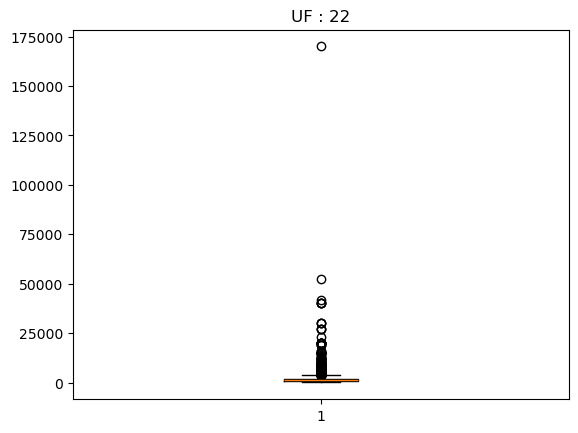

Coluna UF, rotulo: 23
       rendimento bruto mensal em dinheiro
count                          7201.000000
mean                           1687.896126
std                            2515.338512
min                              20.000000
25%                             600.000000
50%                            1302.000000
75%                            1600.000000
max                           45000.000000



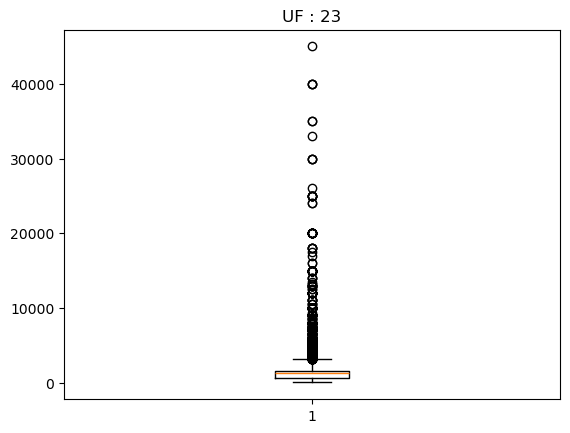

Coluna UF, rotulo: 24
       rendimento bruto mensal em dinheiro
count                          3016.000000
mean                           1926.183687
std                            2335.681885
min                              25.000000
25%                             948.750000
50%                            1320.000000
75%                            2000.000000
max                           40000.000000



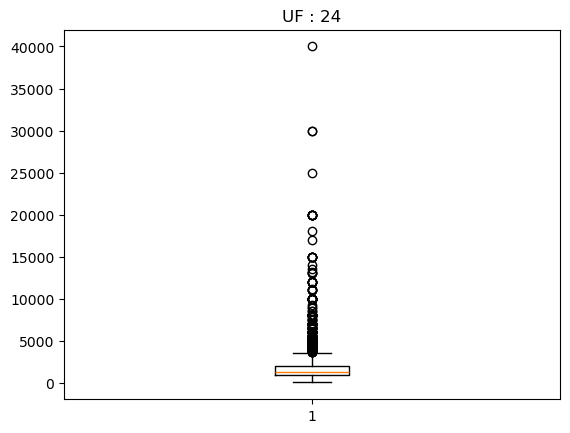

Coluna UF, rotulo: 25
       rendimento bruto mensal em dinheiro
count                          3895.000000
mean                           1988.720154
std                            3825.051711
min                              20.000000
25%                             700.000000
50%                            1320.000000
75%                            1800.000000
max                          150000.000000



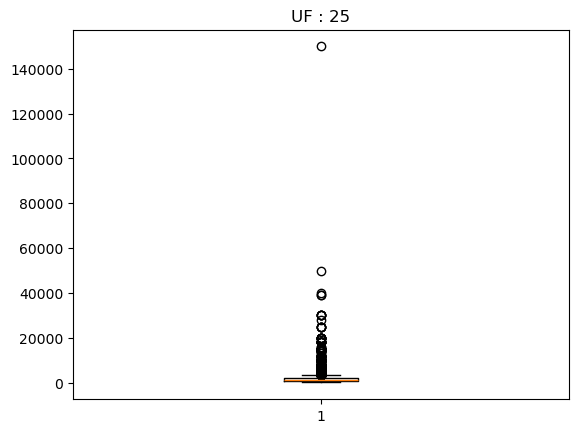

Coluna UF, rotulo: 26
       rendimento bruto mensal em dinheiro
count                          5851.000000
mean                           1947.566741
std                            3928.763071
min                              20.000000
25%                             800.000000
50%                            1320.000000
75%                            2000.000000
max                          200000.000000



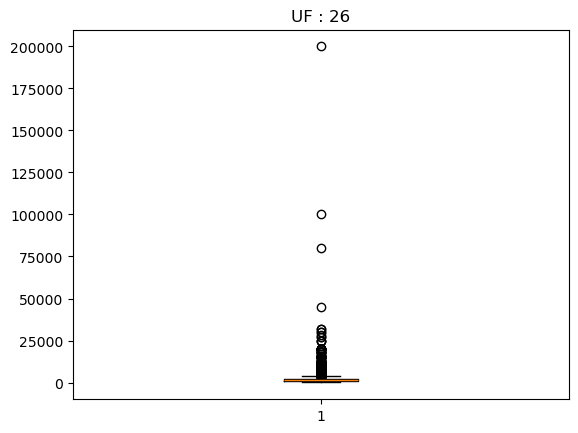

Coluna UF, rotulo: 27
       rendimento bruto mensal em dinheiro
count                          5840.000000
mean                           1810.312842
std                            2348.485536
min                              12.000000
25%                             800.000000
50%                            1320.000000
75%                            1800.000000
max                           50000.000000



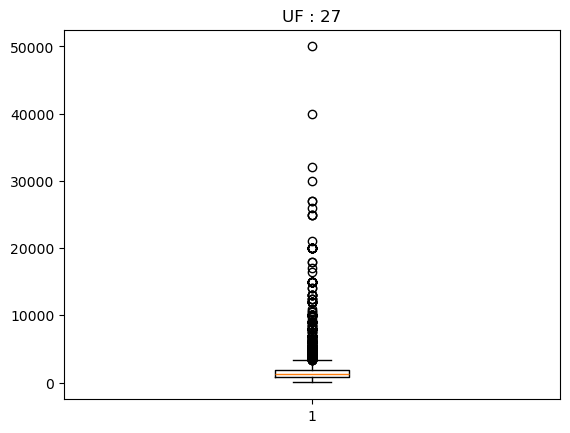

Coluna UF, rotulo: 28
       rendimento bruto mensal em dinheiro
count                          2972.000000
mean                           1790.838156
std                            2631.129925
min                              20.000000
25%                             600.000000
50%                            1302.000000
75%                            1700.000000
max                           30000.000000



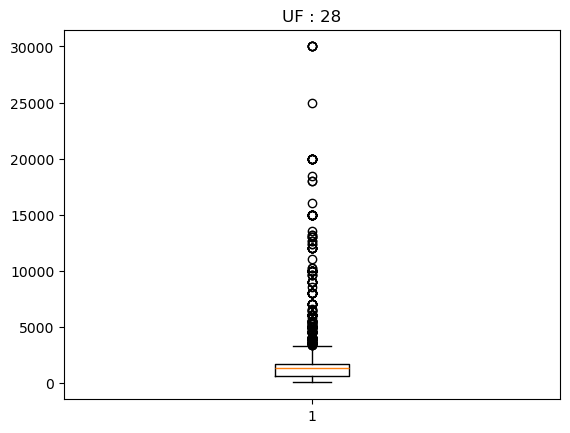

Coluna UF, rotulo: 29
       rendimento bruto mensal em dinheiro
count                          7529.000000
mean                           1602.923629
std                            2078.523278
min                              12.000000
25%                             600.000000
50%                            1302.000000
75%                            1600.000000
max                           40000.000000



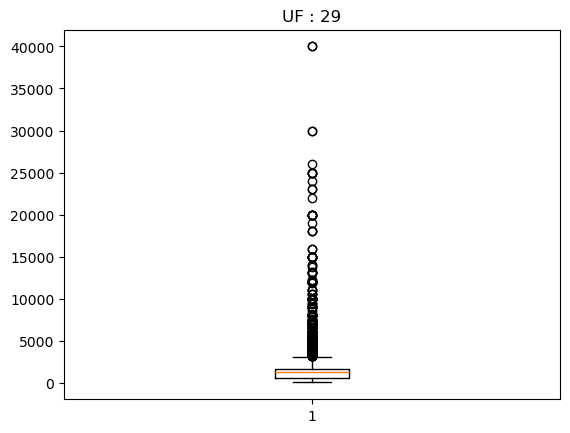

Coluna UF, rotulo: 31
       rendimento bruto mensal em dinheiro
count                         14863.000000
mean                           2538.305457
std                            3763.391463
min                              20.000000
25%                            1302.000000
50%                            1600.000000
75%                            2600.000000
max                          150000.000000



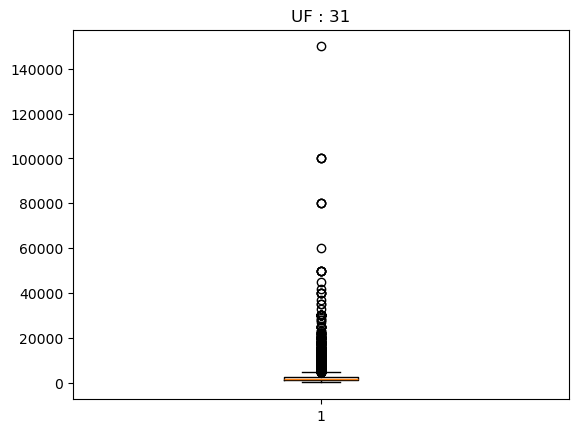

Coluna UF, rotulo: 32
       rendimento bruto mensal em dinheiro
count                          6987.000000
mean                           2730.425361
std                            3313.993889
min                              50.000000
25%                            1320.000000
50%                            1800.000000
75%                            3000.000000
max                           60000.000000



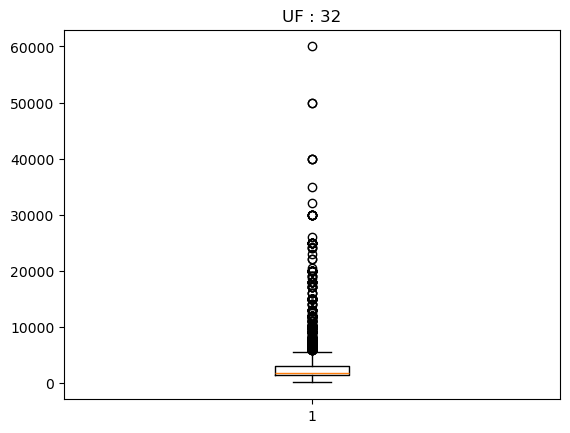

Coluna UF, rotulo: 33
       rendimento bruto mensal em dinheiro
count                         13306.000000
mean                           3284.765519
std                            4723.506065
min                              50.000000
25%                            1320.000000
50%                            1900.000000
75%                            3300.000000
max                          110000.000000



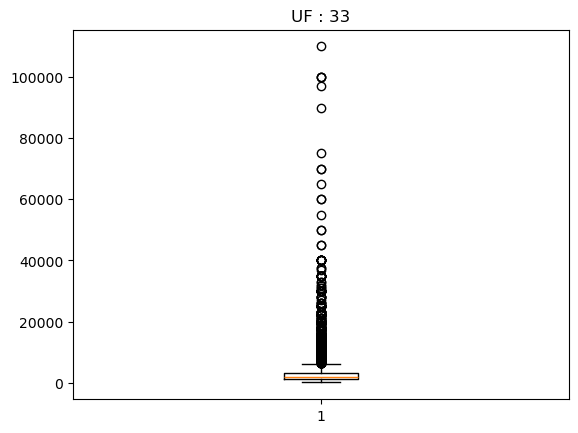

Coluna UF, rotulo: 35
       rendimento bruto mensal em dinheiro
count                         16448.000000
mean                           3336.793835
std                            5510.557533
min                              30.000000
25%                            1480.000000
50%                            2000.000000
75%                            3500.000000
max                          250000.000000



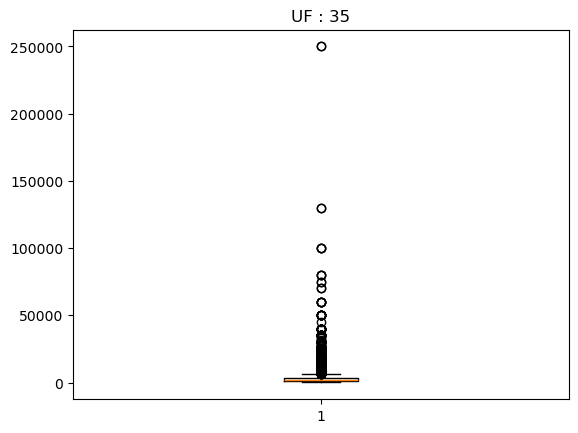

Coluna UF, rotulo: 41
       rendimento bruto mensal em dinheiro
count                          10789.00000
mean                            3053.93206
std                             4189.42005
min                               20.00000
25%                             1500.00000
50%                             2000.00000
75%                             3000.00000
max                           200000.00000



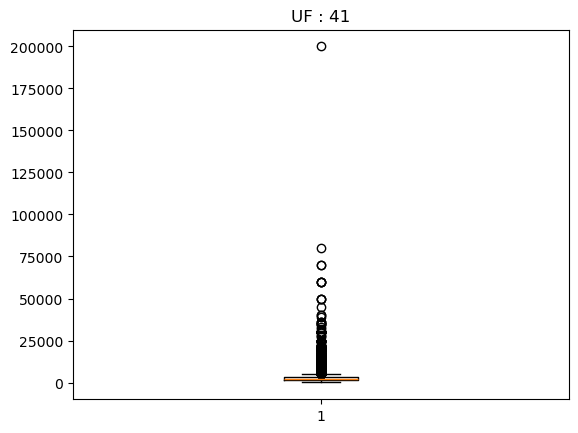

Coluna UF, rotulo: 42
       rendimento bruto mensal em dinheiro
count                         13466.000000
mean                           3208.208228
std                            3358.558229
min                             100.000000
25%                            1600.000000
50%                            2300.000000
75%                            3500.000000
max                           70000.000000



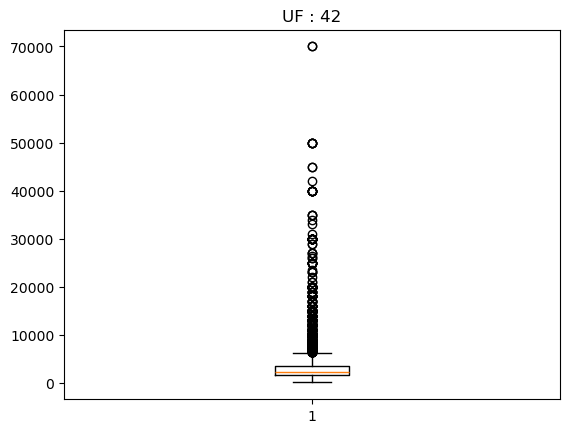

Coluna UF, rotulo: 43
       rendimento bruto mensal em dinheiro
count                         10649.000000
mean                           3238.620340
std                            4071.343318
min                              34.000000
25%                            1450.000000
50%                            2000.000000
75%                            3300.000000
max                          100000.000000



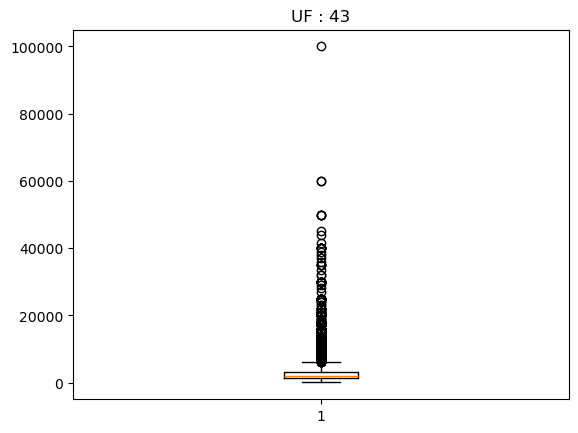

Coluna UF, rotulo: 50
       rendimento bruto mensal em dinheiro
count                          4593.000000
mean                           2977.417374
std                            4360.315840
min                              50.000000
25%                            1400.000000
50%                            2000.000000
75%                            3000.000000
max                          200000.000000



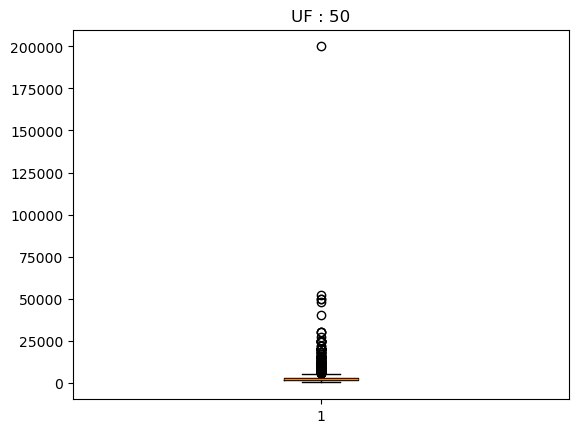

Coluna UF, rotulo: 51
       rendimento bruto mensal em dinheiro
count                          5409.000000
mean                           3206.684785
std                            3691.493152
min                              50.000000
25%                            1400.000000
50%                            2000.000000
75%                            3500.000000
max                           60000.000000



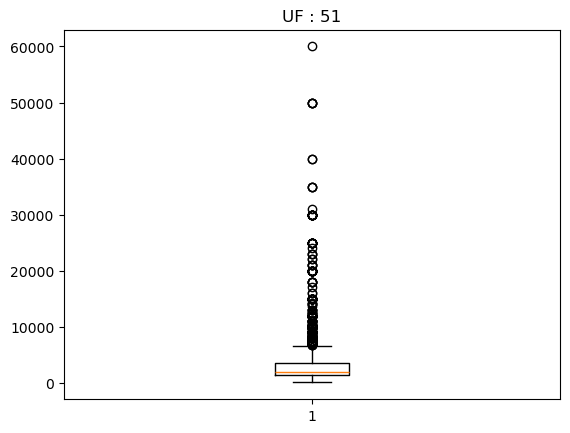

Coluna UF, rotulo: 52
       rendimento bruto mensal em dinheiro
count                          6884.000000
mean                           3011.152528
std                            5048.992199
min                              50.000000
25%                            1320.000000
50%                            1980.000000
75%                            3000.000000
max                          200000.000000



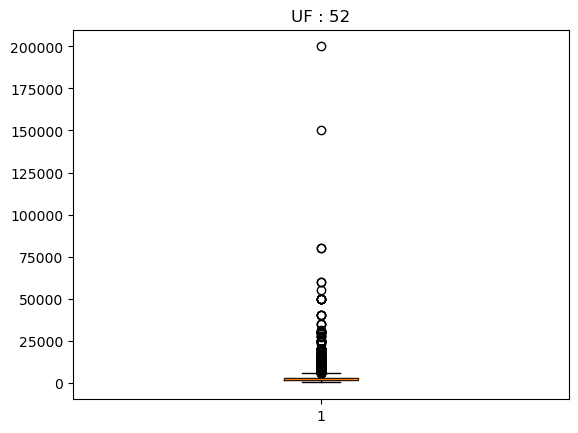

Coluna UF, rotulo: 53
       rendimento bruto mensal em dinheiro
count                          3857.000000
mean                           4607.264454
std                            6116.022699
min                              50.000000
25%                            1400.000000
50%                            2500.000000
75%                            5000.000000
max                           80000.000000



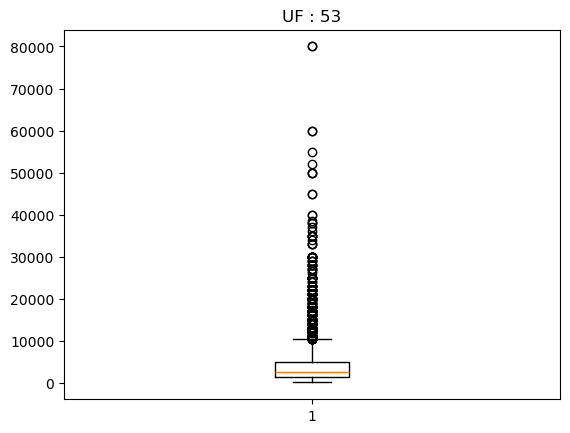

Coluna Rural ou Urbano, rotulo: 1
       rendimento bruto mensal em dinheiro
count                        139626.000000
mean                           2892.669446
std                            4261.150065
min                              15.000000
25%                            1320.000000
50%                            1800.000000
75%                            3000.000000
max                          250000.000000



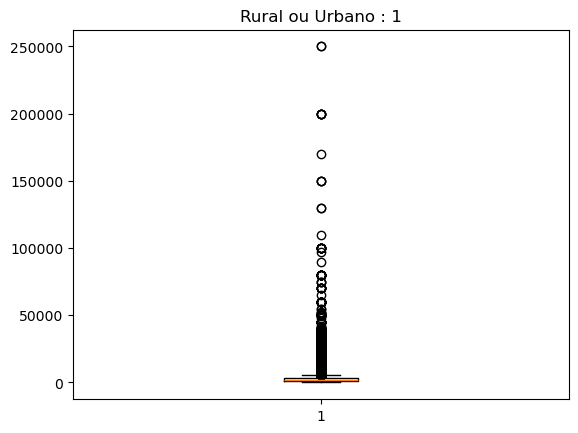

Coluna Rural ou Urbano, rotulo: 2
       rendimento bruto mensal em dinheiro
count                         39556.000000
mean                           1747.699666
std                            2552.737573
min                              12.000000
25%                             680.000000
50%                            1320.000000
75%                            2000.000000
max                          150000.000000



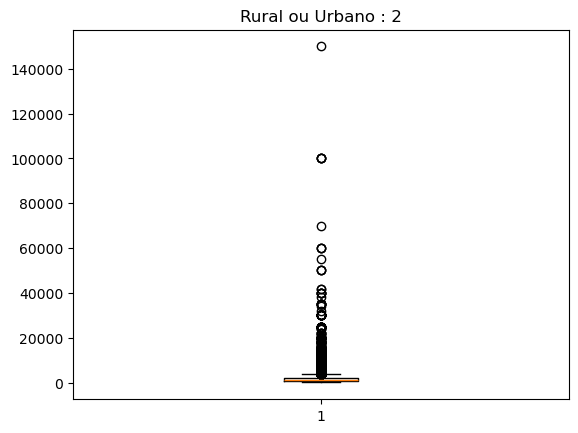

Coluna Sexo, rotulo: 1
       rendimento bruto mensal em dinheiro
count                        105905.000000
mean                           2835.733724
std                            4395.928845
min                              12.000000
25%                            1302.000000
50%                            1800.000000
75%                            3000.000000
max                          250000.000000



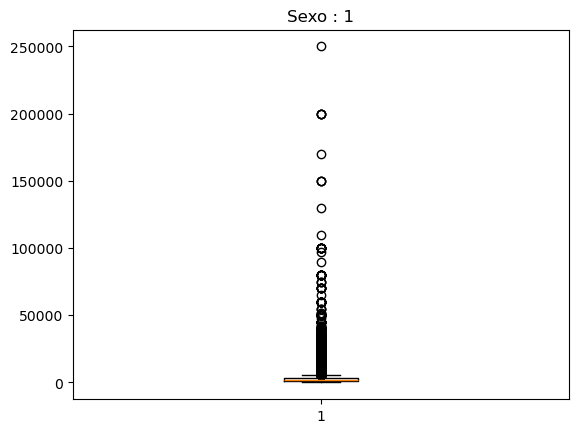

Coluna Sexo, rotulo: 2
       rendimento bruto mensal em dinheiro
count                         73277.000000
mean                           2356.885407
std                            3256.243740
min                              13.000000
25%                            1300.000000
50%                            1500.000000
75%                            2500.000000
max                          250000.000000



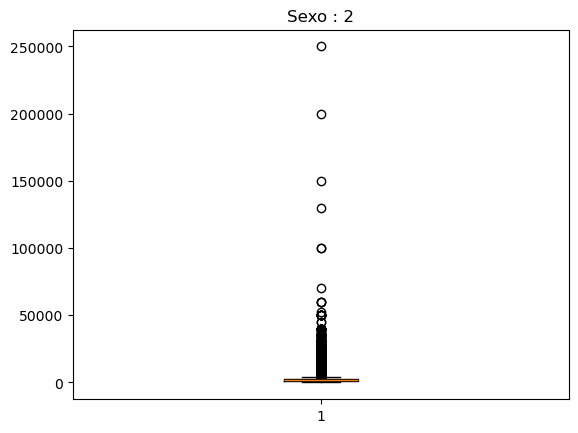

Coluna alfabetizado?, rotulo: 1.0
       rendimento bruto mensal em dinheiro
count                        172319.000000
mean                           2705.682444
std                            4014.211005
min                              12.000000
25%                            1302.000000
50%                            1684.000000
75%                            3000.000000
max                          250000.000000



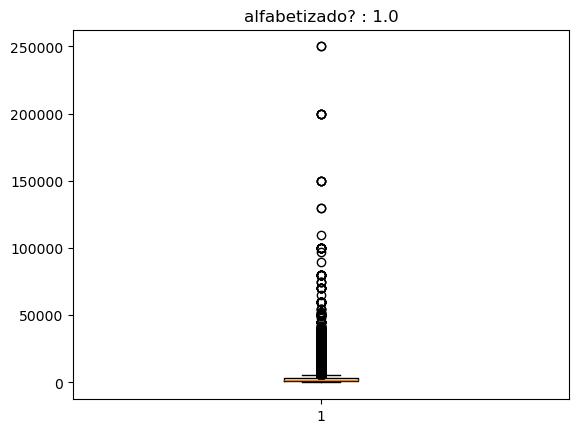

Coluna alfabetizado?, rotulo: 2.0
       rendimento bruto mensal em dinheiro
count                          6863.000000
mean                            988.398514
std                            2328.865440
min                              13.000000
25%                             350.000000
50%                             800.000000
75%                            1320.000000
max                          170000.000000



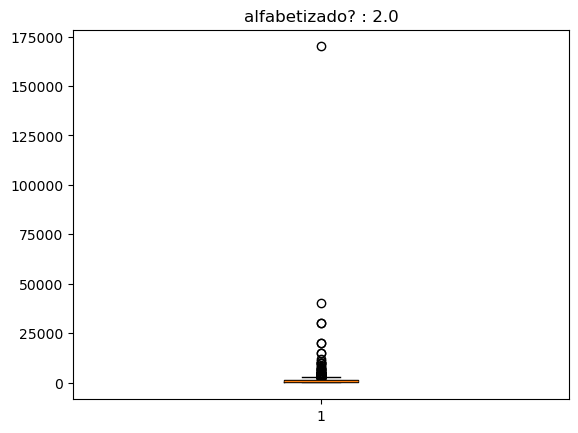

Coluna Cor, rotulo: 4
       rendimento bruto mensal em dinheiro
count                         83966.000000
mean                           2075.186611
std                            2867.335362
min                              13.000000
25%                            1000.000000
50%                            1400.000000
75%                            2300.000000
max                          200000.000000



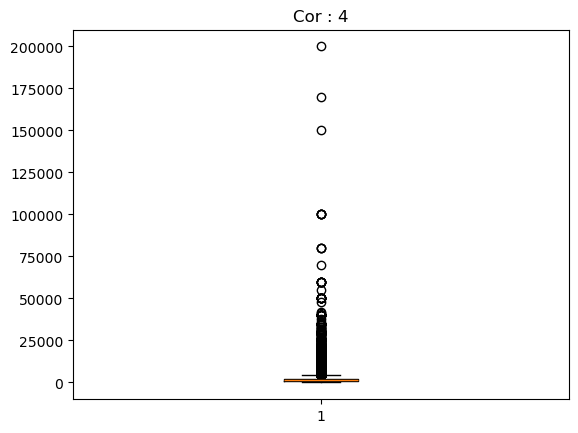

Coluna Cor, rotulo: 1
       rendimento bruto mensal em dinheiro
count                         73983.000000
mean                           3430.354284
std                            5061.201214
min                              20.000000
25%                            1320.000000
50%                            2000.000000
75%                            3500.000000
max                          250000.000000



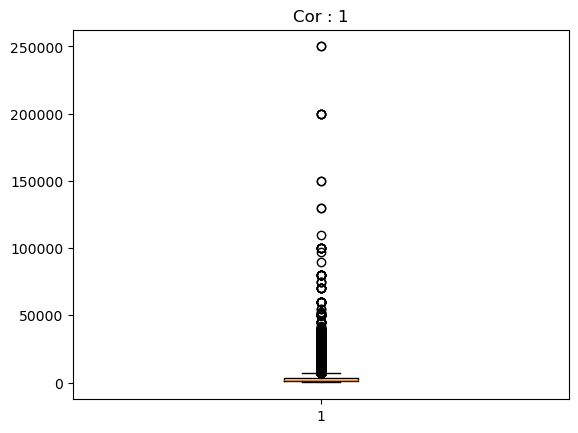

Coluna Cor, rotulo: 2
       rendimento bruto mensal em dinheiro
count                         19183.000000
mean                           2029.940520
std                            2604.510221
min                              12.000000
25%                            1200.000000
50%                            1400.000000
75%                            2200.000000
max                          150000.000000



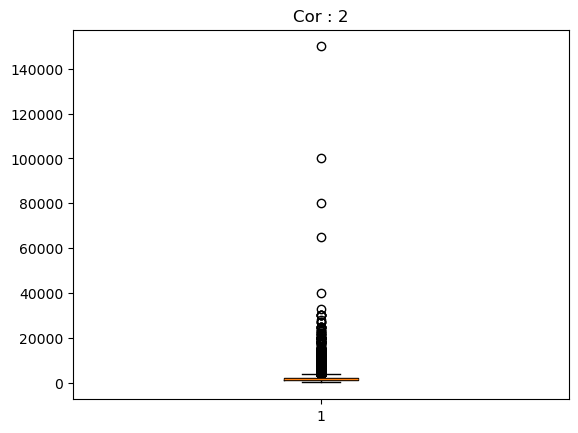

Coluna Cor, rotulo: 3
       rendimento bruto mensal em dinheiro
count                          1184.000000
mean                           3593.364865
std                            4911.787602
min                              12.000000
25%                            1320.000000
50%                            2000.000000
75%                            4000.000000
max                           50000.000000



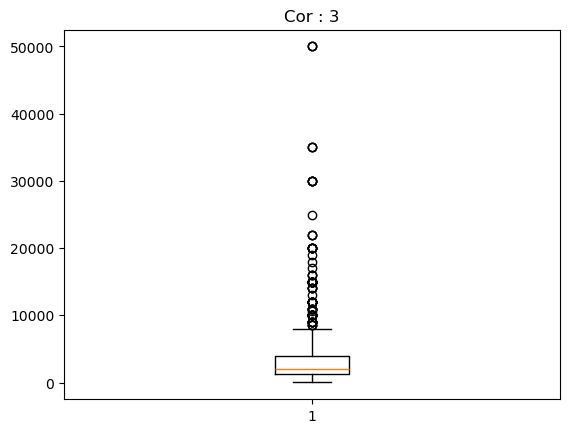

Coluna Cor, rotulo: 5
       rendimento bruto mensal em dinheiro
count                           849.000000
mean                           1960.882214
std                            2624.675342
min                              40.000000
25%                             900.000000
50%                            1320.000000
75%                            2000.000000
max                           40000.000000



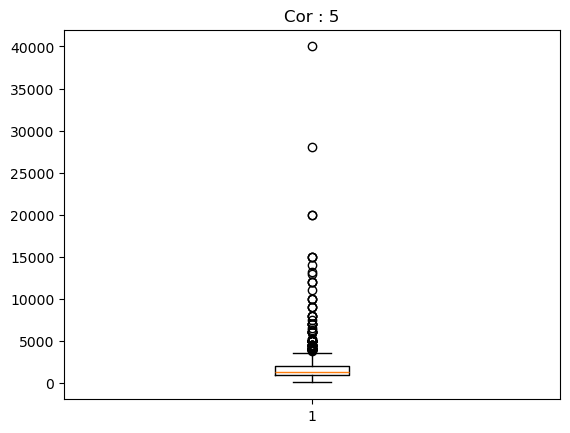

Coluna Cor, rotulo: 9
       rendimento bruto mensal em dinheiro
count                            17.000000
mean                           7715.882353
std                            9397.548257
min                            1320.000000
25%                            1750.000000
50%                            3000.000000
75%                            9000.000000
max                           35000.000000



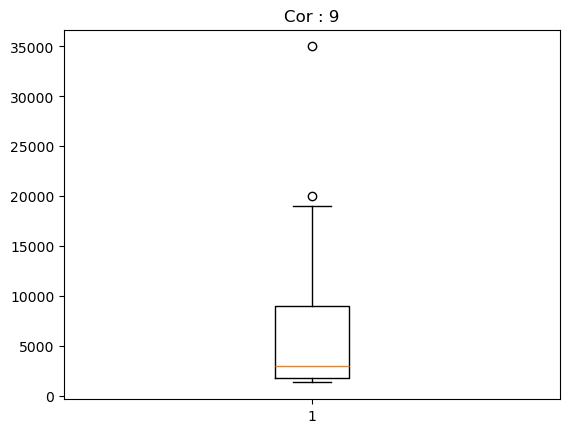

Coluna frequentou escola?, rotulo: 1.0
       rendimento bruto mensal em dinheiro
count                        175176.000000
mean                           2668.772828
std                            3986.215693
min                              12.000000
25%                            1302.000000
50%                            1600.000000
75%                            3000.000000
max                          250000.000000



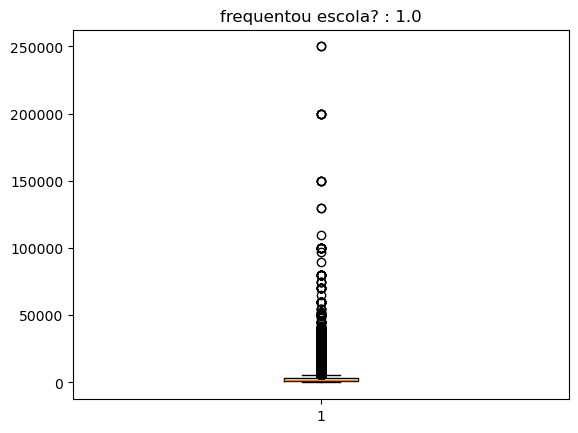

Coluna frequentou escola?, rotulo: 2.0
       rendimento bruto mensal em dinheiro
count                          4006.000000
mean                           1377.664254
std                            3289.974567
min                              20.000000
25%                             500.000000
50%                            1200.000000
75%                            1500.000000
max                          170000.000000



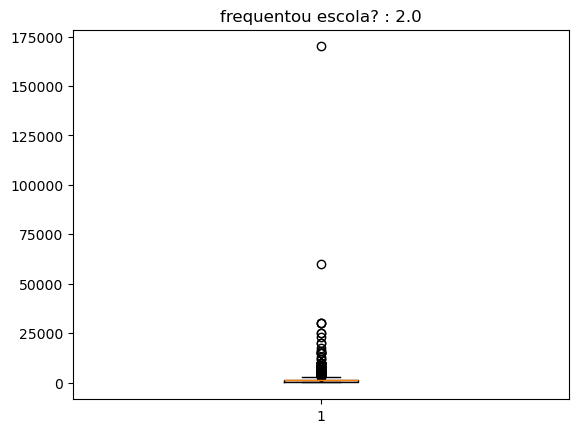

Coluna Trabalha ou faz estágio remunerado, rotulo: 1.0
       rendimento bruto mensal em dinheiro
count                        170640.000000
mean                           2704.754659
std                            4029.252487
min                              12.000000
25%                            1302.000000
50%                            1667.000000
75%                            3000.000000
max                          250000.000000



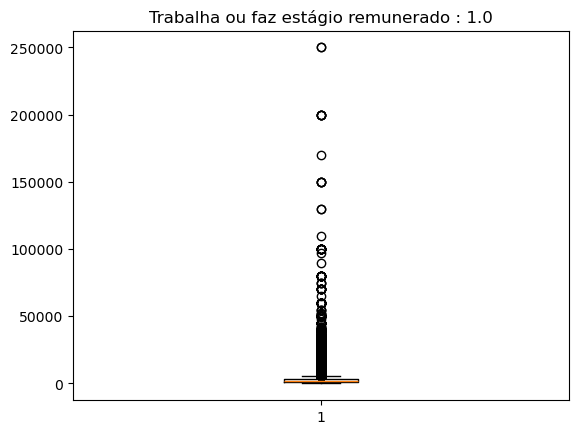

Coluna Trabalha ou faz estágio remunerado, rotulo: 2.0
       rendimento bruto mensal em dinheiro
count                          8542.000000
mean                           1344.478694
std                            2371.611720
min                              12.000000
25%                             326.250000
50%                             800.000000
75%                            1500.000000
max                           80000.000000



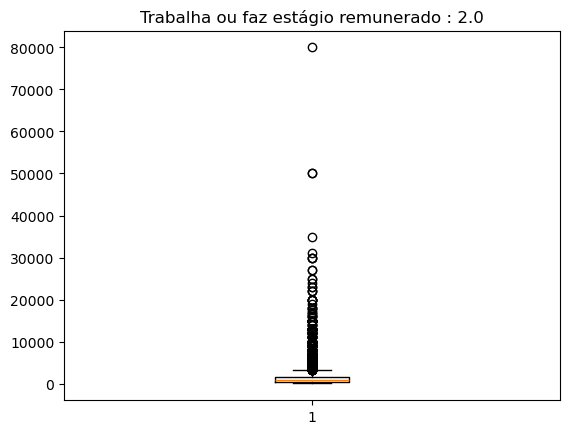

In [61]:
dq = ["UF",	"Rural ou Urbano",	"Sexo",	"alfabetizado?",	"Cor",	"frequentou escola?"	,	"Trabalha ou faz estágio remunerado"]

for d in dq:
    cats = dados[d].unique().tolist()
    base = dados[[d, "rendimento bruto mensal em dinheiro"]]
    for c in cats:
        cond = base[d] == c
        base_ef = base.loc[cond, :]
        print(f'Coluna {d}, rotulo: {c}\n{base_ef.describe()}\n')
        plt.title(f"{d} : {c}")
        #plt.hist(base_ef["rendimento bruto mensal em dinheiro"],density=True,bins=20)
        plt.boxplot(base_ef["rendimento bruto mensal em dinheiro"])
        plt.show()

Usamos o comando Get_Dummies para converter variaveis qualitativas em variáveis quantitativas através de uma lógica binária para podemos usar tais variaveis nas regressões

In [63]:
a = pd.get_dummies(dados, drop_first=True)
display(a)

,Pessoas na Casa,Idade,rendimento bruto mensal em dinheiro,Anos de estudo (>= 5 anos),UF_12,UF_13,UF_14,UF_15,UF_16,UF_17,...,Rural ou Urbano_2,Sexo_2,alfabetizado?_2.0,Cor_2,Cor_3,Cor_4,Cor_5,Cor_9,frequentou escola?_2.0,Trabalha ou faz estágio remunerado_2.0
0,2,30,5000.0,12.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,1,50,3500.0,16.0,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
7,3,54,3700.0,16.0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9,3,36,3300.0,9.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
11,2,33,3500.0,12.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474566,2,48,5000.0,13.0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
474568,3,28,3500.0,16.0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
474570,2,38,10000.0,16.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
474572,3,51,5000.0,14.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Modelos Preditivos: Regressao Linear e Tree Regressor

## Regressão Linear

Definindo função regress para fazer a regressão linear:

In [67]:
def regress(Y,X):

    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

Definindo as Variáveis X,Y, bem como dividindo-as em duas partes cada, sendo uma de treino do código e uma de teste do modelo:

In [69]:

X = a.drop("rendimento bruto mensal em dinheiro", axis=1).astype(float)
Y = a["rendimento bruto mensal em dinheiro"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

### Resultados da Regressão Linear Multipla com as variáveis de treino:

In [71]:
results = regress(y_train,X_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     rendimento bruto mensal em dinheiro   R-squared:                       0.148
Model:                                             OLS   Adj. R-squared:                  0.148
Method:                                  Least Squares   F-statistic:                     534.0
Date:                                 Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                                         02:31:05   Log-Likelihood:            -1.1584e+06
No. Observations:                               120051   AIC:                         2.317e+06
Df Residuals:                                   120011   BIC:                         2.317e+06
Df Model:                                           39                                         
Covariance Type:                             nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -1827.8792    108.323    -16.874      0.000   -2040.191   -1615.568
Pessoas na Casa                            2.0912      7.773      0.269      0.788     -13.144      17.327
Idade                                     49.6681      0.882     56.283      0.000      47.938      51.398
Anos de estudo (>= 5 anos)               322.0218      3.162    101.839      0.000     315.824     328.219
UF_12                                    -90.7223    120.588     -0.752      0.452    -327.072     145.627
UF_13                                   -698.3544    106.836     -6.537      0.000    -907.750    -488.958
UF_14                                   -219.4224    129.376     -1.696      0.090    -472.998      34.153
UF_15                                   -397.4546    101.617     -3.911      0.000    -596.623    -198.286
UF_16                                   -293.9230    140.015     -2.099      0.036    -568.350     -19.495
UF_17                                   -174.1797    118.884     -1.465      0.143    -407.190      58.831
UF_21                                   -731.5696     96.652     -7.569      0.000    -921.006    -542.133
UF_22                                   -657.6044    114.292     -5.754      0.000    -881.615    -433.593
UF_23                                   -833.5129     99.353     -8.389      0.000   -1028.242    -638.783
UF_24                                   -807.0034    117.969     -6.841      0.000   -1038.220    -575.787
UF_25                                   -462.9490    110.904     -4.174      0.000    -680.319    -245.579
UF_26                                   -680.3787    102.482     -6.639      0.000    -881.242    -479.516
UF_27                                   -590.0656    102.630     -5.749      0.000    -791.218    -388.913
UF_28                                   -489.0834    118.222     -4.137      0.000    -720.797    -257.369
UF_29                                   -685.8433     98.822     -6.940      0.000    -879.533    -492.154
UF_31                                   -181.4259     91.350     -1.986      0.047    -360.470      -2.382
UF_32                                   -114.0259     99.731     -1.143      0.253    -309.497      81.445
UF_33                                      8.7088     92.613      0.094      0.925    -172.811     190.228
UF_35                                    160.9827     90.890      1.771      0.077     -17.160     339.126
UF_41                                     12.0449     94.595      0.127      0.899    -173.360     197.450
UF_42  

Filtrando Features Importantes:

In [73]:
condicao = True
while condicao:
    p = results.pvalues.max()
    
    if p > 0.1:
        p_ = results.pvalues.idxmax()
        X_train = X_train.drop(columns=[p_])
        results = sm.OLS(y_train,X_train).fit()
    else:
        condicao = False

In [74]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                         
========================================================================================================
Dep. Variable:     rendimento bruto mensal em dinheiro   R-squared (uncentered):                   0.398
Model:                                             OLS   Adj. R-squared (uncentered):              0.398
Method:                                  Least Squares   F-statistic:                              2268.
Date:                                 Tue, 10 Dec 2024   Prob (F-statistic):                        0.00
Time:                                         02:31:07   Log-Likelihood:                     -1.1587e+06
No. Observations:                               120051   AIC:                                  2.317e+06
Df Residuals:                                   120016   BIC:                                  2.318e+06
Df Model:                                           35                                                  
Covariance Type:                             nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Pessoas na Casa                          -72.3324      7.025    -10.296      0.000     -86.102     -58.563
Idade                                     36.0051      0.642     56.071      0.000      34.747      37.264
Anos de estudo (>= 5 anos)               277.7994      2.479    112.041      0.000     272.940     282.659
UF_12                                   -462.0048     92.363     -5.002      0.000    -643.035    -280.975
UF_13                                  -1013.3527     73.782    -13.734      0.000   -1157.965    -868.741
UF_14                                   -556.2862    103.647     -5.367      0.000    -759.433    -353.140
UF_15                                   -756.4220     65.793    -11.497      0.000    -885.376    -627.468
UF_16                                   -587.6927    116.819     -5.031      0.000    -816.656    -358.729
UF_17                                   -543.3645     90.080     -6.032      0.000    -719.920    -366.809
UF_21                                  -1095.7283     57.812    -18.953      0.000   -1209.039    -982.417
UF_22                                  -1006.3449     84.084    -11.968      0.000   -1171.148    -841.542
UF_23                                  -1234.2304     61.597    -20.037      0.000   -1354.959   -1113.501
UF_24                                  -1212.1251     88.390    -13.713      0.000   -1385.369   -1038.881
UF_25                                   -879.9016     78.788    -11.168      0.000   -1034.326    -725.478
UF_26                                  -1085.8257     66.384    -16.357      0.000   -1215.937    -955.714
UF_27                                   -995.0659     66.751    -14.907      0.000   -1125.897    -864.235
UF_28                                   -903.1975     88.976    -10.151      0.000   -1077.589    -728.806
UF_29                                  -1067.1669     60.980    -17.500      0.000   -1186.686    -947.648
UF_31                                   -587.7155     47.198    -12.452      0.000    -680.222    -495.209
UF_32                                   -508.4400     61.925     -8.211      0.000    -629.811    -387.069
UF_35                                   -241.3240     45.748     -5.275      0.000    -330.988    -151.660
UF_41                                   -436.9219     52.410     -8.337      0.000    -539.645    -334.199
UF_42                                   -312.4685     48.803     -6.403      0.000    -408.121    -216.816
UF_43          

### Erro Médio Absoluto do Modelo de Regressão Linear:

In [76]:
y_pred1 = results.predict(X_test.loc[:,X_train.columns].astype(float)) 
mean_absolute_error(y_test, y_pred1)

1635.8570005418187

### Compara valores previstos pelo Modelo de Regressão Linear com os valores reais 

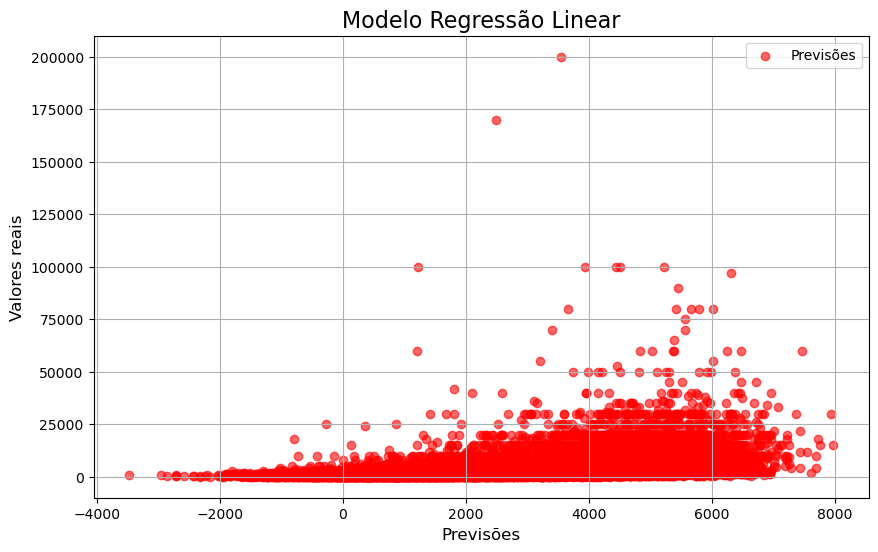

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred1, y_test, color='red', label='Previsões', alpha=0.6)

plt.title('Modelo Regressão Linear', fontsize=16)
plt.xlabel('Previsões', fontsize=12)
plt.ylabel('Valores reais', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

### Probplot para comparar formato da distribuição dos resíduos com uma distribuição normal:

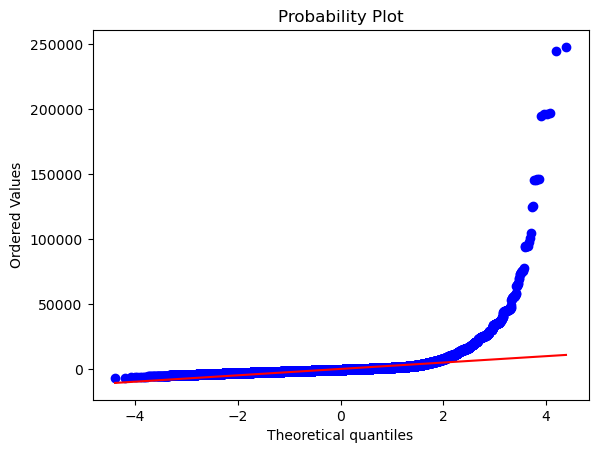

In [80]:
from scipy import stats
stats.probplot(results.resid,  dist='norm', plot=plt)
plt.show()



## Tree Regressor 

Redefinindo variáveis de Treino e Teste para usa-las no segundo modelo (Tree Regressor):


In [83]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.33, random_state=42)


Tree Regressor:

In [85]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train2,y_train2) 

DecisionTreeRegressor(random_state=0)

Erro Médio Absoluto do Modelo Tree Regressor:

In [87]:
#Primeira forma de calcular a média do erro absoluto: 
y_pred2 = regressor.predict(X_test2) 
mean_absolute_error(y_test2, y_pred2)

1897.0695546597078

In [88]:
#Segunda forma de calcular a média do erro absoluto: 
ema_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
score = cross_val_score(regressor,X_test2, y_pred2, cv=5, scoring=ema_scorer)
print("Erro médio absoluto para cada fold:", -score)  # Inverte o sinal, porque greater_is_better=False
print("EMA médio:", -score.mean())

Erro médio absoluto para cada fold: [1162.25536745 1138.74306508 1219.49373578 1116.66342731 1192.84359503]
EMA médio: 1165.9998381300843


R² - R-squared:

In [93]:
r_ = mean_squared_error(y_test2, y_pred2)
print("Erro Quadrático Médio:",r_)
r2 = r2_score(y_test2, y_pred2)
print("R² (coeficiente de determinação):",r2)

Erro Quadrático Médio: 22199439.89076434
R² (coeficiente de determinação): -0.545900229366119


Abaixo usa-se "feature_importances_" para indicar a importância de cada feature, refletindo quão relevante a feature foi para a tomada de decisão do modelo.

In [96]:
regressor.feature_importances_ #apenas para visualização

array([1.47157561e-01, 3.61190336e-01, 2.33454093e-01, 3.38483313e-03,
       6.31903946e-03, 2.65225262e-03, 4.86796010e-03, 1.92157500e-03,
       3.04097894e-03, 3.02713100e-03, 3.22886035e-03, 4.49612545e-03,
       2.58918388e-03, 8.52474125e-03, 9.72852474e-03, 4.10978829e-03,
       3.00470047e-03, 3.17383657e-03, 1.01300596e-02, 5.80444948e-03,
       9.46427008e-03, 7.58206321e-03, 5.95542536e-03, 6.55766674e-03,
       1.39651782e-02, 5.23748088e-03, 5.06230527e-03, 7.77477979e-03,
       8.57321729e-03, 2.88970943e-02, 3.14739615e-02, 1.69669106e-03,
       1.23789453e-02, 5.28057552e-03, 1.63923210e-02, 1.14298125e-03,
       8.81607814e-05, 9.35479371e-04, 9.73537316e-03])

### Compara valores previstos pelo Modelo Tree Regressor com os valores reais 

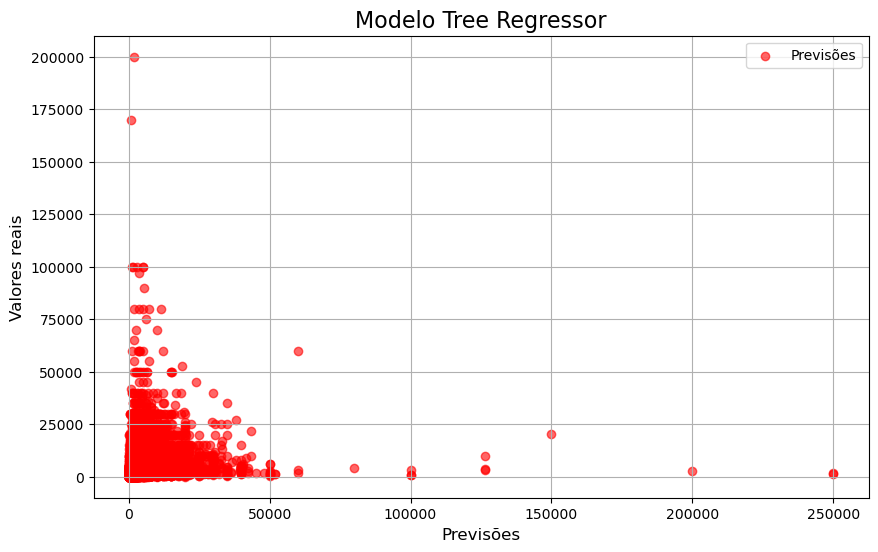

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred2, y_test2, color='red', label='Previsões', alpha=0.6)

plt.title('Modelo Tree Regressor', fontsize=16)
plt.xlabel('Previsões', fontsize=12)
plt.ylabel('Valores reais', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

# Conclusão da Regressão Linear
O modelo de Regressão Linear apresentou um coeficiente de determinação - indicador de poder preditivo de um modelo estatístico - de cerca de 40%, ou seja, nosso modelo não foi capaz de compreender a maioria das informações disponíveis ao ponto de utilizá-las de modo eficaz na previsão da target "rendimento mensal em dinheiro", melhor dizendo, não conseguimos estabelecer uma relação forte entre as variáveis. Além disso, foi encontrado um erro absoluto médio de aproximadamente 1636 reais sobre a previsão da target, o que demonstra que ao usar o modelo para determinação do valor da renda, o valor encontrado pode ter um desvio discrepante da realidade, o que é muito explícito no gráfico do Modelo de Regressão Linear que relaciona os valores reais e os calculados pelo modelo.
Com isso, se tornou claro que nosso modelo não é a melhor opção para se prever o rendimento mensal em dinheiro.

# Conclusão do Tree Regressor: 

A primeira forma de calcular a média do erro médio não considera a divisão dos dados em múltiplos folds, podendo ser menos confiável para base de dados pequenas. Nesse cálculo, obtivemos um erro de aproximadamente 1897 na renda mensal em dinehiro do indivíduo, sendo uma quantidade significativa, uma vez que aumentaria ou diminuiria a renda mensal da pessoa em mais do que o valor de um salário mínimo (R$ 1.412,00).
Já a segunda forma de calcular a média do erro médio analisa a divisão dos dados em folds, fornecendo uma estimativa do desempenho geral do modelo. Nele, obtivemos uma média de erros de aproximadamente 1165, que ainda é um valor considerável para a média de erros na predição da renda mensal de uma pessoa, mas já  é menor do que o obtido na primeira forma de cálculo. 

Além das discrepancias dos dados, analisando o coeficiente de determinação, que deu -0.5459, entendemos que o modelo Tree Regressor não pode estabelecer, pelom menos com as informações/features escolhidas, uma boa relação com a target "rendimento mensal em dinheiro", não sendo uma opção inteligente caso o objetivo seja prever essa variável.